# Plotting the Inconsistency Events per Task for the Different Matching Logic Approaches
## NAME: Rishit Chaudhary
## SRN: PES1201800316

In [1]:
from pathlib import Path
import seaborn as sns
import os
import pandas as pd
import numpy as np

In [2]:
class LogRecord:
    TRACE_NAME_IND = 0
    GM_COUNT_IND = 1
    LM_COUNT_IND = 2
    PARTITION_SIZE_IND = 3
    INTERNAL_INCONSISTENCY_COUNT_IND = 16
    EXTERNAL_INCONSISTENCY_COUNT_IND = 17
    INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 12
    EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND = 13
    SUCCESS_PERCENT_IND = 30
    AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND = 31

    LAST_TERM_IND = -1
    
    def __init__(self, file_data):
        self.file_data = file_data.split('\n')
        print(self.file_data)

    def __extract_int(self, line_index, term_index):
        print(self.file_data[line_index])
        return int(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_float(self, line_index, term_index):
        print(self.file_data[line_index])
        return float(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_str(self, line_index, term_index):
        print(self.file_data[line_index])
        return str(self.file_data[line_index].strip().split()[term_index])
    
    def __extract_success_percent(self, line_index, term_index):
        return float(self.file_data[line_index].strip().split()[term_index].split('=')[-1].rstrip('%'))
    
    def get_gm_count(self):
        return self.__extract_int(LogRecord.GM_COUNT_IND, self.LAST_TERM_IND)

    def get_lm_count(self):
        return self.__extract_int(LogRecord.LM_COUNT_IND, self.LAST_TERM_IND)

    def get_partition_size(self):
        return self.__extract_int(LogRecord.PARTITION_SIZE_IND, self.LAST_TERM_IND)
 
    def get_cluster_size(self):
        return self.get_gm_count() * self.get_lm_count() * self.get_partition_size()

    def get_internal_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.INTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)
    
    def get_external_matching_logic_operation_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_MATCHING_LOGIC_OPERATION_COUNT_IND, self.LAST_TERM_IND)

    def get_avg_workers_searched_per_task_count(self):
        return self.__extract_float(LogRecord.AVG_WORKERS_SEARCHED_PER_TASK_COUNT_IND, self.LAST_TERM_IND)

    def get_trace_file_name(self):
        return self.__extract_str(LogRecord.TRACE_NAME_IND, self.LAST_TERM_IND)

    def get_success_percent(self):
        return self.__extract_success_percent(LogRecord.SUCCESS_PERCENT_IND, LogRecord.LAST_TERM_IND)
    
    def get_internal_inconsistency_count(self):
        return self.__extract_int(LogRecord.INTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)
    
    def get_external_inconsistency_count(self):
        return self.__extract_int(LogRecord.EXTERNAL_INCONSISTENCY_COUNT_IND, LogRecord.LAST_TERM_IND)

In [3]:
MATCHING_LOGIC_TECHNIQUES = ['Original',
                             'Separation',
                             'Ordering_L_M',
                             'Ordering_M_L',
                             'Ordering_L_L',
                             'Ordering_M_M']

# Cluster Size
TEN_THOUSAND_NODE_CLUSTER_SIZE = 10000
THOUSAND_NODE_CLUSTER_SIZE = 1000

CLUSTER_TRACE_NAMES = {'YH1_sub', 'YH2_sub'}

# BASE_FILE_PATH = Path("./inconsistency_count")
BASE_FILE_PATH = Path("./inconsistency_worker_count")
EXTRA_FILE_PATH = Path("inconsistency_data_with_separate_random_seed")
# BASE_FILE_PATH = Path("./inconsistency_count_with_same_random_seed")

INTERNAL_INCONSISTENCY_FILE_EXTENSION = "_ini.txt"
EXTERNAL_INCONSISTENCY_FILE_EXTENSION = "_exi.txt"
WORKERS_SEARCHED_FILE_EXTENSION = "_workers_searched.txt"
LOG_FILE_EXTENSION = ".log"

BASE_FILE_PATH

PosixPath('inconsistency_worker_count')

In [4]:
MATCHING_LOGIC_DATA = dict()

MAIN_STATISTICS = 0
INTERNAL_INCONSISTENCY_COUNT = 1
EXTERNAL_INCONSISTENCY_COUNT = 2
COMBINED_INCONSISTENCY_COUNT = 3

WORKERS_SEARCHED_COUNT = 4
READ_WORKERS_SEARCHED_COUNT = 5


for logic in MATCHING_LOGIC_TECHNIQUES:
    MATCHING_LOGIC_DATA[logic] = dict()
    for trace in CLUSTER_TRACE_NAMES:
        MATCHING_LOGIC_DATA[logic][trace] = dict()
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            MATCHING_LOGIC_DATA[logic][trace][cluster_size] = dict()
            MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT] = dict()
            MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT] = dict()
        

In [5]:
isLogFile = lambda x : x.endswith(LOG_FILE_EXTENSION)
isInternalInconsistencyFile = lambda x : x.endswith(INTERNAL_INCONSISTENCY_FILE_EXTENSION)
isExternalInconsistencyFile = lambda x : x.endswith(EXTERNAL_INCONSISTENCY_FILE_EXTENSION)
isWorkersSearchedFile = lambda x: x.endswith(WORKERS_SEARCHED_FILE_EXTENSION)

In [6]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    FILES_IN_MATCHING_LOGIC_FOLDER = os.listdir(BASE_FILE_PATH / Path(logic) / EXTRA_FILE_PATH)
    LOG_FILE_LIST = filter(isLogFile, FILES_IN_MATCHING_LOGIC_FOLDER)
    for log_file in LOG_FILE_LIST:
        LOG_FILE_NAME_WITHOUT_EXTENSION = log_file.split('.')[0]
        INTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isInternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        EXTERNAL_INCONSISTENCY_FILE = [x
                                       for x in FILES_IN_MATCHING_LOGIC_FOLDER
                                           if isExternalInconsistencyFile(x) and
                                              x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)]
        
#         WORKERS_SEARCHED_FILE = [
#             x
#             for x in FILES_IN_MATCHING_LOGIC_FOLDER
#                 if isWorkersSearchedFile(x) and
#                    x.startswith(LOG_FILE_NAME_WITHOUT_EXTENSION)
#         ]
        
        # ---
        
        if bool(INTERNAL_INCONSISTENCY_FILE) is False or \
           bool(EXTERNAL_INCONSISTENCY_FILE) is False or \
           os.path.getsize(BASE_FILE_PATH / Path(logic) / EXTRA_FILE_PATH / Path(log_file)) == 0:
            continue

        # Get the trace name from log_file
        with open(BASE_FILE_PATH / Path(logic) / EXTRA_FILE_PATH / Path(log_file)) as fHandler:
            file_data = fHandler.read()
            cluster_trace_name = LogRecord(file_data).get_trace_file_name()
            cluster_size = LogRecord(file_data).get_cluster_size()
            
        if cluster_trace_name not in CLUSTER_TRACE_NAMES:
            continue

        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][MAIN_STATISTICS] = log_file
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][INTERNAL_INCONSISTENCY_COUNT] = \
            INTERNAL_INCONSISTENCY_FILE[0]
        MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][EXTERNAL_INCONSISTENCY_COUNT] = \
            EXTERNAL_INCONSISTENCY_FILE[0]
#         MATCHING_LOGIC_DATA[logic][cluster_trace_name][cluster_size][WORKERS_SEARCHED_COUNT] = \
#             WORKERS_SEARCHED_FILE[0]


MATCHING_LOGIC_DATA

['Analysing logs for trace file: YH2_sub', 'Number of GMs: 10', 'Number of LMs: 10', 'Number of Partition Size: 100', 'Simulator Info , Received CMD line arguments.', 'Simulator Info , Simulation running', 'Simulation ended in 19899.05502820015 s ', 'Simulator Info , Number of Jobs completed: 3363', '', '', '--------------------------------------------------------------------------------', '', '\x1binternal_matching_logic_op\x1b : 58381037', '\x1bexternal_matching_logic_op\x1b : 597818503', '\x1btask_end_event\x1b : 137029', '\x1blaunch_on_node_event\x1b : 137029', '\x1binternal_inconsistency_event\x1b : 6040', '\x1bexternal_inconsistency_event\x1b : 44757', '\x1bmatch_found_event\x1b : 187826', '\x1bperiodic_lm_update_event\x1b : 1446', '\x1baperiodic_lm_update_event\x1b : 187826', '\x1bjob_arrival_event\x1b : 3363', '\x1bcluster_saturated_event\x1b : 34105', '', '', '--------------------------------------------------------------------------------', '', 'Derived attributes:', '\x1bTot

{'Original': {'YH2_sub': {10000: {3: {},
    5: {},
    0: 'record-2021-10-15-18-19-50.log',
    1: 'record-2021-10-15-18-19-50_ini.txt',
    2: 'record-2021-10-15-18-19-50_exi.txt'},
   1000: {3: {},
    5: {},
    0: 'record-2021-10-15-18-19-48.log',
    1: 'record-2021-10-15-18-19-48_ini.txt',
    2: 'record-2021-10-15-18-19-48_exi.txt'}},
  'YH1_sub': {10000: {3: {},
    5: {},
    0: 'record-2021-10-15-18-19-49.log',
    1: 'record-2021-10-15-18-19-49_ini.txt',
    2: 'record-2021-10-15-18-19-49_exi.txt'},
   1000: {3: {},
    5: {},
    0: 'record-2021-10-15-18-19-46.log',
    1: 'record-2021-10-15-18-19-46_ini.txt',
    2: 'record-2021-10-15-18-19-46_exi.txt'}}},
 'Separation': {'YH2_sub': {10000: {3: {},
    5: {},
    0: 'record-2021-10-15-18-20-26.log',
    1: 'record-2021-10-15-18-20-26_ini.txt',
    2: 'record-2021-10-15-18-20-26_exi.txt'},
   1000: {3: {},
    5: {},
    0: 'record-2021-10-15-18-20-23.log',
    1: 'record-2021-10-15-18-20-23_ini.txt',
    2: 'record-2021-1

In [7]:
getPathToFile = lambda matching_logic, file_name : BASE_FILE_PATH / Path(matching_logic) / EXTRA_FILE_PATH / Path(file_name)
getPathToFile("Separation", "record-2021-10-13-17-42-17_ini.txt")

PosixPath('inconsistency_worker_count/Separation/inconsistency_data_with_separate_random_seed/record-2021-10-13-17-42-17_ini.txt')

In [8]:
for logic in MATCHING_LOGIC_TECHNIQUES:
    for trace in CLUSTER_TRACE_NAMES:
        for cluster_size in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE]:
            print(logic, trace, cluster_size)
            INTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][INTERNAL_INCONSISTENCY_COUNT]
            EXTERNAL_INCONSISTENCY_FILE = MATCHING_LOGIC_DATA[logic][trace][cluster_size][EXTERNAL_INCONSISTENCY_COUNT]
            
            with open(getPathToFile(logic, INTERNAL_INCONSISTENCY_FILE)) as fHandler_int, \
                 open(getPathToFile(logic, EXTERNAL_INCONSISTENCY_FILE)) as fHandler_ext:
#                  open(getPathToFile(logic, WORKERS_SEARCHED_FILE)) as fHandler_workers:
                    # Adding internal inconsistency counts
                    for line in fHandler_int:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

                    # Adding external inconsistency counts
                    for line in fHandler_ext:
                        job_id_task_id, inconsistency_count = [x.strip() for x in line.split(':')]
                        inconsistency_count = int(inconsistency_count)
                        MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT][job_id_task_id] = \
                            inconsistency_count + \
                                MATCHING_LOGIC_DATA[logic][trace][cluster_size][COMBINED_INCONSISTENCY_COUNT].get(job_id_task_id, 0)

                    # Adding workers searched counts
#                     for line in fHandler_workers:
#                         job_id_task_id, search_count = [x.strip() for x in line.split(':')]
#                         search_count = int(search_count)
#                         MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT][job_id_task_id] = \
#                             search_count + \
#                                 MATCHING_LOGIC_DATA[logic][trace][cluster_size][READ_WORKERS_SEARCHED_COUNT].get(job_id_task_id, 0)


MATCHING_LOGIC_DATA

Original YH2_sub 10000
Original YH2_sub 1000
Original YH1_sub 10000
Original YH1_sub 1000
Separation YH2_sub 10000
Separation YH2_sub 1000
Separation YH1_sub 10000
Separation YH1_sub 1000
Ordering_L_M YH2_sub 10000
Ordering_L_M YH2_sub 1000
Ordering_L_M YH1_sub 10000
Ordering_L_M YH1_sub 1000
Ordering_M_L YH2_sub 10000
Ordering_M_L YH2_sub 1000
Ordering_M_L YH1_sub 10000
Ordering_M_L YH1_sub 1000
Ordering_L_L YH2_sub 10000
Ordering_L_L YH2_sub 1000
Ordering_L_L YH1_sub 10000
Ordering_L_L YH1_sub 1000
Ordering_M_M YH2_sub 10000
Ordering_M_M YH2_sub 1000
Ordering_M_M YH1_sub 10000
Ordering_M_M YH1_sub 1000


{'Original': {'YH2_sub': {10000: {3: {'16_4': 1,
     '26_56': 1,
     '26_26': 22,
     '26_60': 36,
     '26_8': 1,
     '26_7': 25,
     '26_1': 40,
     '26_25': 50,
     '26_15': 19,
     '26_51': 6,
     '26_13': 35,
     '26_59': 20,
     '26_14': 44,
     '26_9': 18,
     '26_3': 33,
     '26_12': 51,
     '26_6': 40,
     '26_16': 38,
     '26_45': 20,
     '26_30': 32,
     '26_20': 41,
     '26_24': 51,
     '26_23': 43,
     '26_19': 37,
     '26_17': 45,
     '26_18': 48,
     '26_28': 19,
     '26_58': 24,
     '26_21': 26,
     '26_31': 52,
     '26_41': 50,
     '26_27': 15,
     '26_32': 1,
     '26_46': 50,
     '26_36': 26,
     '26_40': 31,
     '26_29': 34,
     '26_39': 17,
     '26_35': 15,
     '26_33': 37,
     '26_34': 40,
     '26_44': 20,
     '26_57': 27,
     '26_37': 12,
     '26_38': 31,
     '26_47': 30,
     '26_48': 49,
     '26_42': 33,
     '26_43': 21,
     '26_77': 19,
     '26_62': 34,
     '26_52': 42,
     '26_55': 28,
     '26_49': 34,
     '2

---

## Get the Total Task Count per Trace:

In [9]:
TASK_COUNT_IND = 1
CLUSTER_TRACE_FILE_EXTENSION = ".tr"

In [10]:
def total_tasks_in_trace(PATH_TO_TRACE_FILE, cluster_trace_name):
    task_count = 0
    with open(PATH_TO_TRACE_FILE / Path(cluster_trace_name + CLUSTER_TRACE_FILE_EXTENSION)) as fHandler:
        for job in fHandler:
            task_count += int(job.split()[TASK_COUNT_IND])
    
    return task_count

In [11]:
PATH_TO_TRACE_FILE = BASE_FILE_PATH / Path("traces")

total_task_count_per_trace = dict()

for cluster_trace_name in CLUSTER_TRACE_NAMES:
    total_task_count_per_trace[cluster_trace_name] = total_tasks_in_trace(PATH_TO_TRACE_FILE, cluster_trace_name)

total_task_count_per_trace

{'YH2_sub': 137029, 'YH1_sub': 122878}

---

In [12]:
WORKERS_SEARCHED_X_AXIS_NAME = INCONSISTENCY_COUNT_X_AXIS_NAME = "Matching Logic Approaches"

In [13]:
INCONSISTENCY_COUNT_Y_AXIS_NAME = "Inconsistency Count per Task"

In [14]:
WORKERS_SEARCHED_Y_AXIS_NAME = "Workers Searched per Task"

In [15]:
def create_inconsistency_dataframe(MATCHING_LOGIC_DATA, CLUSTER_TRACE_NAMES, TRACE_NAME, CLUSTER_SIZE):
    assert TRACE_NAME in CLUSTER_TRACE_NAMES, f"Invalid trace name={TRACE_NAME} provided!"
    assert CLUSTER_SIZE in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE], \
            f"Invalid cluster size={CLUSTER_SIZE} provided!"
    
    input_list = list()
#     for logic in filter(lambda x : x != "Original", MATCHING_LOGIC_TECHNIQUES):  # To ignore Original approach
    for logic in MATCHING_LOGIC_TECHNIQUES:
        # Add tasks which did have inconsistency events > 0
        for datum in MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].values():
            input_list.append([logic, datum])
        
        # Add tasks which did not have any inconsistency events with 0
#         NO_INCONSISTENCY_EVENT = 0
#         task_count_with_inconsistency_event = \
#             len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].keys())
#         for _ in range(total_task_count_per_trace[TRACE_NAME] - task_count_with_inconsistency_event):
#             input_list.append([logic, NO_INCONSISTENCY_EVENT])

    return pd.DataFrame(input_list, columns=[INCONSISTENCY_COUNT_X_AXIS_NAME, INCONSISTENCY_COUNT_Y_AXIS_NAME])

In [16]:
def create_workers_searched_dataframe(MATCHING_LOGIC_DATA, CLUSTER_TRACE_NAMES, TRACE_NAME, CLUSTER_SIZE):
    assert TRACE_NAME in CLUSTER_TRACE_NAMES, f"Invalid trace name={TRACE_NAME} provided!"
    assert CLUSTER_SIZE in [TEN_THOUSAND_NODE_CLUSTER_SIZE, THOUSAND_NODE_CLUSTER_SIZE], \
            f"Invalid cluster size={CLUSTER_SIZE} provided!"
    
    input_list = list()
#     for logic in filter(lambda x : x != "Original", MATCHING_LOGIC_TECHNIQUES):  # To ignore Original approach
    for logic in MATCHING_LOGIC_TECHNIQUES:
        # Add tasks which did have inconsistency events > 0
        for datum in MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][READ_WORKERS_SEARCHED_COUNT].values():
            input_list.append([logic, datum])
        
        # Add tasks which did not have any inconsistency events with 0
#         NO_INCONSISTENCY_EVENT = 0
#         task_count_with_inconsistency_event = \
#             len(MATCHING_LOGIC_DATA[logic][TRACE_NAME][CLUSTER_SIZE][COMBINED_INCONSISTENCY_COUNT].keys())
#         for _ in range(total_task_count_per_trace[TRACE_NAME] - task_count_with_inconsistency_event):
#             input_list.append([logic, NO_INCONSISTENCY_EVENT])

    return pd.DataFrame(input_list, columns=[WORKERS_SEARCHED_X_AXIS_NAME, WORKERS_SEARCHED_Y_AXIS_NAME])

---

In [17]:
import seaborn as sns

sns.set(rc={'figure.figsize':(15.7,10.5)})
sns.set(font_scale = 1.75)

---

In [18]:
SHOW_OUTLIERS = False

# Inconsistency Events Per Task

## Plot for `YH1_sub` in 1000 Node cluster

In [19]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "YH1_sub",
                               1000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                   14858.0  1.717122  1.616743   
Ordering_L_M                                   18439.0  1.688758  1.558331   
Ordering_M_L                                   18326.0  1.634672  1.437998   
Ordering_M_M                                   20512.0  2.221431  2.196929   
Original                                       15406.0  1.622939  1.607001   
Separation                                     17820.0  1.630640  1.623680   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  1.0  2.0  46.0  
Ordering_L_M               1.0  1.0  1.0  2.0  56.0  
Ordering_M_L               1.0  1.0  1.0  2.0  39.0  
Ordering_M_M               1.0  1.0  1.0  3.0  63.0  
Original                   1.0  1.0  1.0  2.0  55.0  
Separation                 1.0  1.0  1.0  2.0  92.0

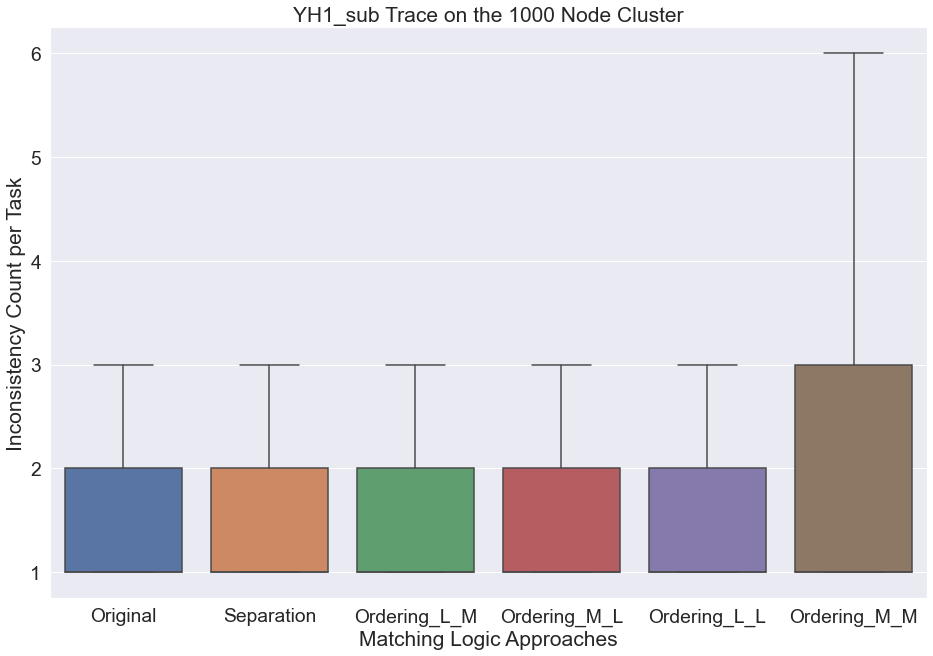

In [20]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME, 
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "YH1_sub",
                                                     1000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH1_sub Trace on the 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH1_sub_1000.jpeg"), dpi=300) 

---

## Plot for `YH1_sub` in 10,000 Node cluster

In [21]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "YH1_sub",
                               10_000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                     966.0  2.928571  2.259825   
Ordering_L_M                                      77.0  1.155844  0.431184   
Ordering_M_L                                     510.0  2.633333  1.582340   
Ordering_M_M                                     135.0  1.059259  0.266625   
Original                                         647.0  2.299845  1.630699   
Separation                                       249.0  1.261044  0.602522   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  2.0  4.0  11.0  
Ordering_L_M               1.0  1.0  1.0  1.0   3.0  
Ordering_M_L               1.0  1.0  2.0  3.0   8.0  
Ordering_M_M               1.0  1.0  1.0  1.0   3.0  
Original                   1.0  1.0  2.0  3.0   8.0  
Separation                 1.0  1.0  1.0  1.0   4.0

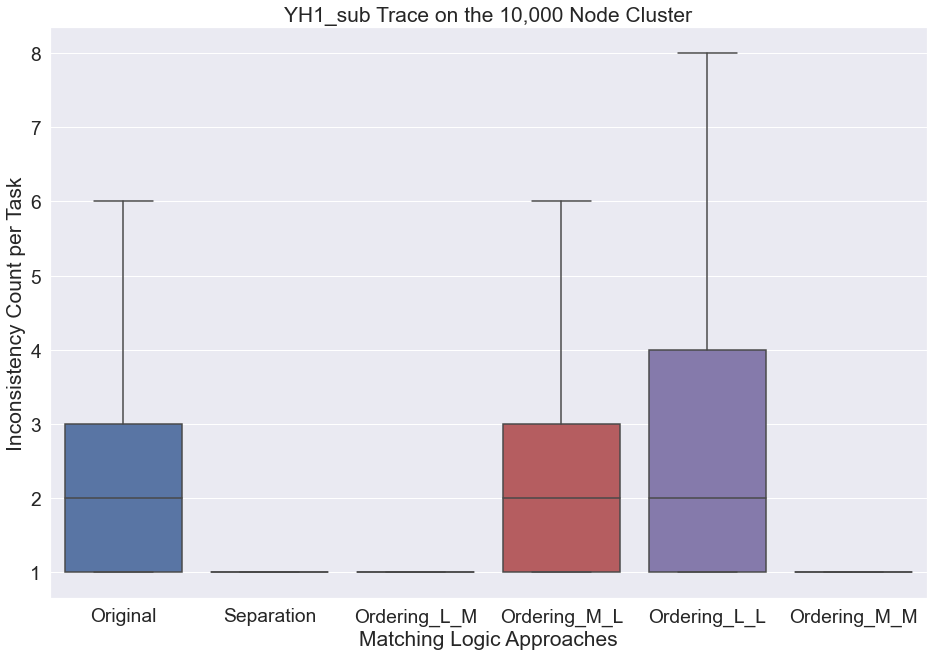

In [22]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME,
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "YH1_sub",
                                                     10_000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH1_sub Trace on the 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH1_sub_10_000.jpeg"), dpi=300) 

---

## Plot for `YH2_sub` in 1000 Node cluster

In [23]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "YH2_sub",
                               1000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                   20984.0  1.878717  2.081689   
Ordering_L_M                                   18217.0  1.851183  2.045105   
Ordering_M_L                                   17275.0  1.712012  1.662231   
Ordering_M_M                                   16248.0  1.749200  1.879731   
Original                                       17338.0  1.698350  1.758874   
Separation                                     22152.0  1.746975  1.616369   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  1.0  2.0  84.0  
Ordering_L_M               1.0  1.0  1.0  2.0  61.0  
Ordering_M_L               1.0  1.0  1.0  2.0  25.0  
Ordering_M_M               1.0  1.0  1.0  2.0  88.0  
Original                   1.0  1.0  1.0  2.0  60.0  
Separation                 1.0  1.0  1.0  2.0  80.0

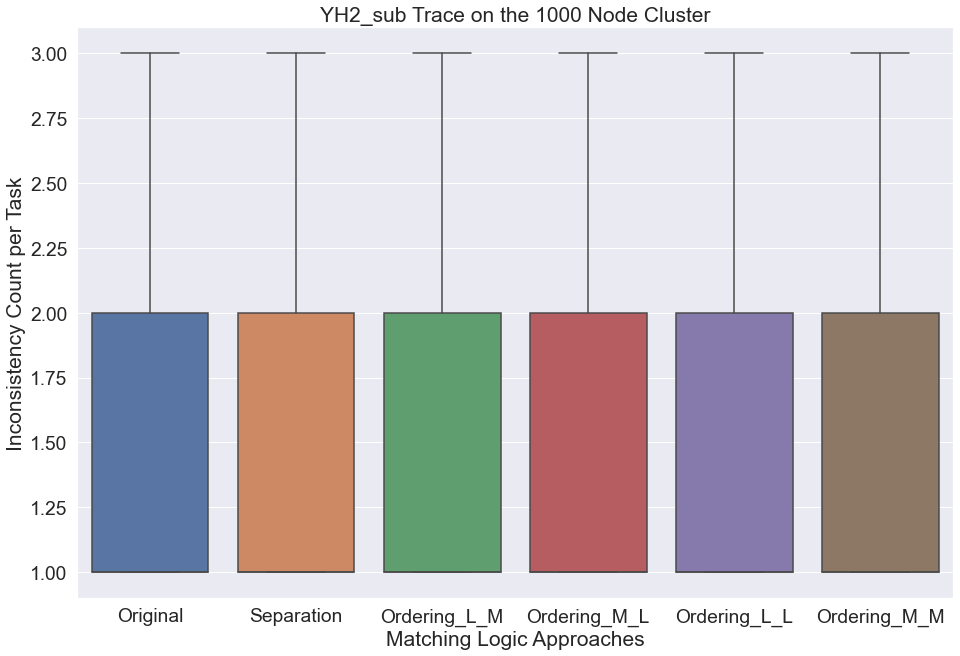

In [24]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME,
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "YH2_sub",
                                                     1000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH2_sub Trace on the 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH2_sub_1000.jpeg"), dpi=300) 

---

## Plot for `YH2_sub` in 10,000 Node cluster

In [25]:
create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                               CLUSTER_TRACE_NAMES,
                               "YH2_sub",
                               10_000
                               ).groupby(INCONSISTENCY_COUNT_X_AXIS_NAME).describe()

Inconsistency Count per Task                      \
                                                 count      mean       std   
Matching Logic Approaches                                                    
Ordering_L_L                                   10638.0  3.250705  3.004437   
Ordering_L_M                                    9019.0  3.164209  3.174105   
Ordering_M_L                                   10222.0  3.190374  3.018379   
Ordering_M_M                                   10175.0  3.500934  3.084259   
Original                                       11437.0  4.441462  6.477421   
Separation                                      9420.0  2.914225  3.048441   

                                                     
                           min  25%  50%  75%   max  
Matching Logic Approaches                            
Ordering_L_L               1.0  1.0  2.0  4.0  47.0  
Ordering_L_M               1.0  1.0  2.0  4.0  39.0  
Ordering_M_L               1.0  1.0  2.0  4.0  30.0  
Ordering_M_M               1.0  2.0  3.0  4.0  47.0  
Original                   1.0  1.0  3.0  5.0  53.0  
Separation                 1.0  1.0  2.0  3.0  36.0

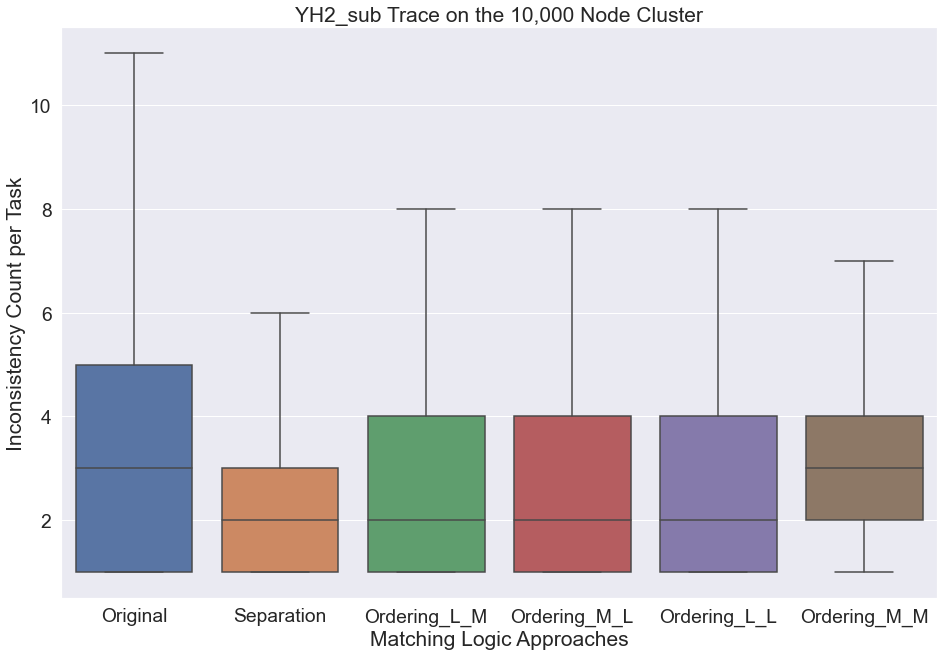

In [26]:
ax = sns.boxplot(x=INCONSISTENCY_COUNT_X_AXIS_NAME, y=INCONSISTENCY_COUNT_Y_AXIS_NAME,
                 data=create_inconsistency_dataframe(MATCHING_LOGIC_DATA,
                                                     CLUSTER_TRACE_NAMES,
                                                     "YH2_sub",
                                                     10_000
                                                     ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH2_sub Trace on the 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH2_sub_10_000.jpeg"), dpi=300) 

---

In [27]:
SHOW_OUTLIERS = True

# Workers Searched Per Task

## Plot for `YH1_sub` in 1000 Node cluster

In [28]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "YH1_sub",
                                  1000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

IndexError: list index out of range

In [ ]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "YH1_sub",
                                                        1000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH1_sub Trace on 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH1_sub_1000_workers_searched.jpeg"), dpi=300) 

---

## Plot for `YH1_sub` in 10,000 Node cluster

In [ ]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "YH1_sub",
                                  10_000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

In [ ]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "YH1_sub",
                                                        10_000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH1_sub Trace on 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH1_sub_10_000_workers_searched.jpeg"), dpi=300) 

---

## Plot for `YH2_sub` in 1000 Node cluster

In [ ]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "YH2_sub",
                                  1000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

In [ ]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "YH2_sub",
                                                        1000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH2_sub Trace on 1000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH2_sub_1000_workers_searched.jpeg"), dpi=300) 

---

## Plot for `YH2_sub` in 10,000 Node cluster

In [ ]:
create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                  CLUSTER_TRACE_NAMES,
                                  "YH2_sub",
                                  10_000
                                  ).groupby(WORKERS_SEARCHED_X_AXIS_NAME).describe()

In [ ]:
ax = sns.boxplot(x=WORKERS_SEARCHED_X_AXIS_NAME, y=WORKERS_SEARCHED_Y_AXIS_NAME, 
                 data=create_workers_searched_dataframe(MATCHING_LOGIC_DATA,
                                                        CLUSTER_TRACE_NAMES,
                                                        "YH2_sub",
                                                        10_000
                                                        ), showfliers = SHOW_OUTLIERS)
ax.set(title='YH2_sub Trace on 10,000 Node Cluster')

fig = ax.get_figure()
fig.savefig(fname= BASE_FILE_PATH / Path('BoxPlot_Images') / Path("YH2_sub_10_000_workers_searched.jpeg"), dpi=300) 

---